# Практическая работа №6: Исследование результатов фильтрации дискретного сигнала с помощью рекурсивных фильтров, построенных на основе формул численного дифференцирования и интегрирования

Выполнили студенты гр. 0383 Бояркин Никита и Сергевнин Дмитрий. Вариант №19.

## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью фильтров, основанных на формулах численного дифференцирования и интегрирования, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).

## Основные теоретические положения

Дискретный сигнал:

$$s(t)=\sum_{k=-\infty}^{\infty} x_k\delta(t-k)$$

Спектр дискретного сигнала:

$$S(\omega)=\sum_{k=-\infty}^{\infty} x_ke^{-i\omega k}$$

Последовательность отсчётов $\{x_k\}$ является периодической с периодом $N$.

Дискретное преобразование Фурье (ДПФ):

$$X(n)=\sum_{k=0}^{N-1}x_ke^{-i\frac{2 \pi n}{N}k}, \quad n=0,1,2,...,N-1$$

Обратное дискретное преобразование Фурье (ОДПФ):

$$x_k=\frac1n \sum_{n=0}^{N-1} X(n)e^{i\frac{2 \pi k}{N}n}, \quad k=0,1,2,...,N-1$$

Сглаживание входного сигнала — приближение (в смысле МНК) сигнала $s(t)$ функцией $y(t)$ по $N$ точкам:

$$\sum_{k=0}^{N}(s_k-y_k)^2 \Rightarrow min$$

Дискретный фильтр, соответствующий численному дифференцированию 1-го порядка:

$$y_n = \frac{s_{n+1}-s_{n-1}}{2h}$$

Дискретный фильтр, соответствующий численному интегрированию прямоугольников:

$$y_{n+1} = y_n + s_{n+\frac{1}{2}}$$

Дискретный фильтр, соответствующий численному интегрированию трапеций:

$$y_{n+1} = y_n + \frac{s_n+s_{n+1}}{2}$$

Дискретный фильтр, соответствующий численному интегрированию Симпсона:

$$y_{n+1} = y_{n-1}+\frac{s_{n-1}+4s_n+s_{n+1}}{3}$$

## Постановка задачи

Для заданного дискретного сигнала применить фильтры, основанные на формулах численного дифференцирования и интегрирования. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы


Импорт необходимых модулей

In [1]:
import numpy as np
import matplotlib.pyplot as plt

1. Сформируем дискретный сигнал посредством дискретизации с шагом $T = 1$ непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида $A_k cos(\omega_k t + \varphi_k)$. Частота каждой из гармоник не должна превышать $\pi$. Всего одиннадцать гармоник с упорядоченными по возрастанию частотами от 0 до $\pi$, изменяющимися с шагом $\varDelta \omega = 0.1\pi$. Амплитуды гармоник $A_k$ представляют собой целые числа со значениями от 1 до 11, определяемые случайным образом с помощью датчика равномерно распределенных случайных чисел. При необходимости нормализовать коэффициенты линейной комбинации посредством деления их на сумму полученных случайным образом амплитуд. Начальные фазы $\varphi_k$ представляют собой случайные числа в промежутке от 0 до 0.5. Дискретная последовательность должна включать в себя 32 отсчета ($N = 31$).

In [2]:
# Заданные параметры
N = 31
T = 1
delta_omega = 0.1 * np.pi

# Генерация случайных амплитуд и нормализация амплитуд
amplitudes = np.random.randint(1, 12, 11)
amplitudes = amplitudes / np.sum(amplitudes)

phases = np.random.uniform(0, 0.5, 11)

frequencies = np.arange(0, np.pi + delta_omega, delta_omega)


time_d = np.arange(0, N + T, T)
time_a = np.arange(0, N + 0.01, 0.01)

# Формирование сигнала

def signal(time):
    signal = 0
    for k in range(11):
        signal += amplitudes[k] * np.cos(frequencies[k] * time + phases[k])
    return signal

2. Визуализируем исходные аналоговый и дискретизированный сигналы.

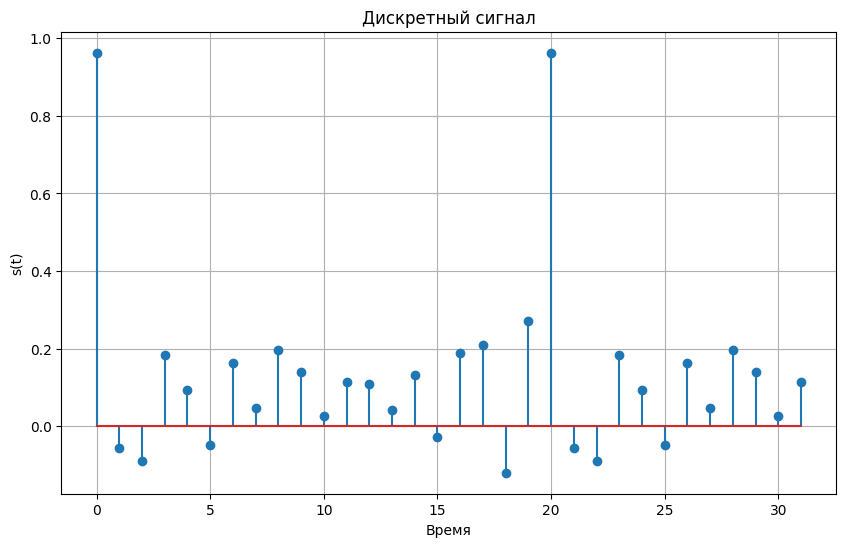

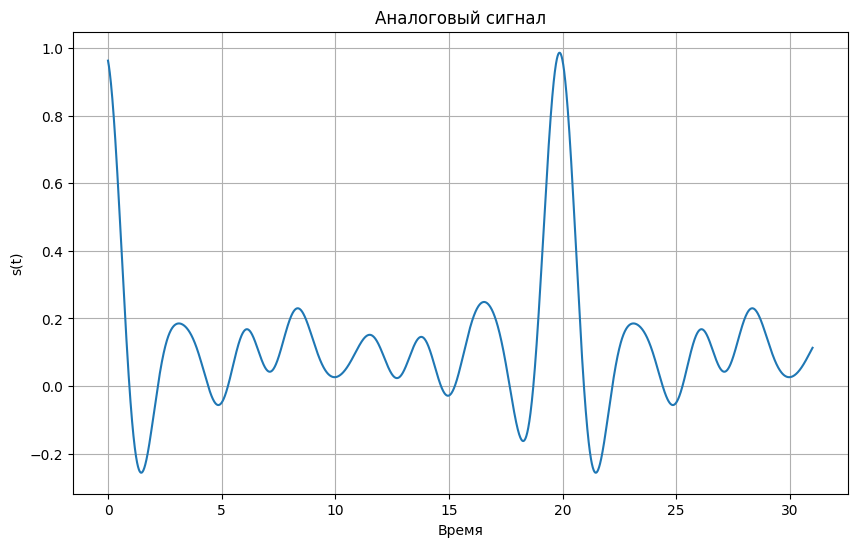

In [3]:
# Визуализация сигнала
plt.figure(figsize=(10, 6))
plt.stem(time_d, signal(time_d))
plt.xlabel('Время')
plt.ylabel('s(t)')
plt.title('Дискретный сигнал')
plt.grid()
plt.show()


# Визуализация сигнала
plt.figure(figsize=(10, 6))
plt.plot(time_a, signal(time_a))
plt.xlabel('Время')
plt.ylabel('s(t)')
plt.title('Аналоговый сигнал')
plt.grid()
plt.show()

3. С помощью ДПФ найдем дискретные отсчеты спектра дискретного сигнала и визуализируем их.

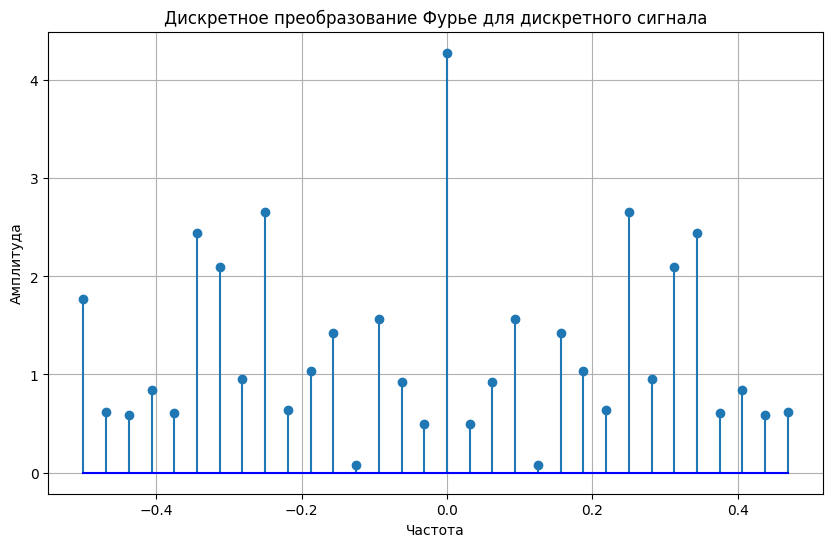

In [4]:
# Генерации массива частот для ДПФ
fft_freq_d = np.fft.fftfreq(N + 1, T)
# Вычисление ДПФ для дискретного сигнала
X = np.fft.fft(signal(time_d))

# Визуализация
plt.figure(figsize=(10, 6))

plt.stem(fft_freq_d, np.abs(X), basefmt="b")
plt.title('Дискретное преобразование Фурье для дискретного сигнала')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.grid()
plt.show()

4. Необходимо для дискретного сигнала применить линейное сглаживание по 5-ти и 9-ти точкам, представить формулу для $H(\omega)$ – передаточной функции (частотной характеристики) фильтра.

Формула для линейного сглаживание по 5 точкам:

$$y_n = \frac{s_{n-2}+s_{n-1}+s_{n}+s_{n+1}+s_{n+2}}{5}$$

Передаточная функция:

$$H(\omega)=\frac{sin(\frac{5ω}{2})}{5sin(\frac{ω}{2})}$$

Формула для линейного сглаживание по 9 точкам:

$$y_n = \frac{s_{n-4}+s_{n-3}+s_{n-2}+s_{n-1}+s_{n}+s_{n+1}+s_{n+2}+s_{n+3}+s_{n+4}}{9}$$

Передаточная функция:

$$H(\omega)=\frac{sin(\frac{9ω}{2})}{9sin(\frac{ω}{2})}$$

In [5]:
def lin_smoothing_M(s, M):
    return np.convolve(s, (1 / M) *np.ones(M), mode='same')

smoothing_5 = lin_smoothing_M(signal(time_d), 5)
smoothing_9 = lin_smoothing_M(signal(time_d), 9)

5. Визуализировать полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.

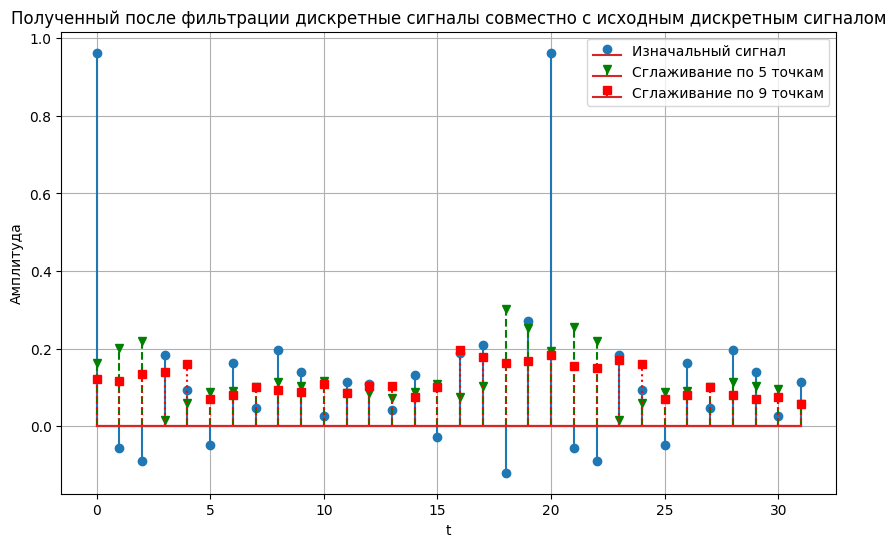

In [6]:
plt.figure(figsize=(10, 6))
plt.stem(time_d, signal(time_d), label="Изначальный сигнал")
plt.stem(time_d, smoothing_5, linefmt="g--",  markerfmt="v",
label="Сглаживание по 5 точкам")
plt.stem(time_d, smoothing_9, linefmt="r:", markerfmt="s",
label="Сглаживание по 9 точкам")
plt.ylabel(r"Амплитуда")
plt.xlabel(r"t")
plt.title('Полученный после фильтрации дискретные сигналы совместно с исходным дискретным сигналом')
plt.legend()
plt.grid()
plt.show()

6. С помощью ДПФ необходимо найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.

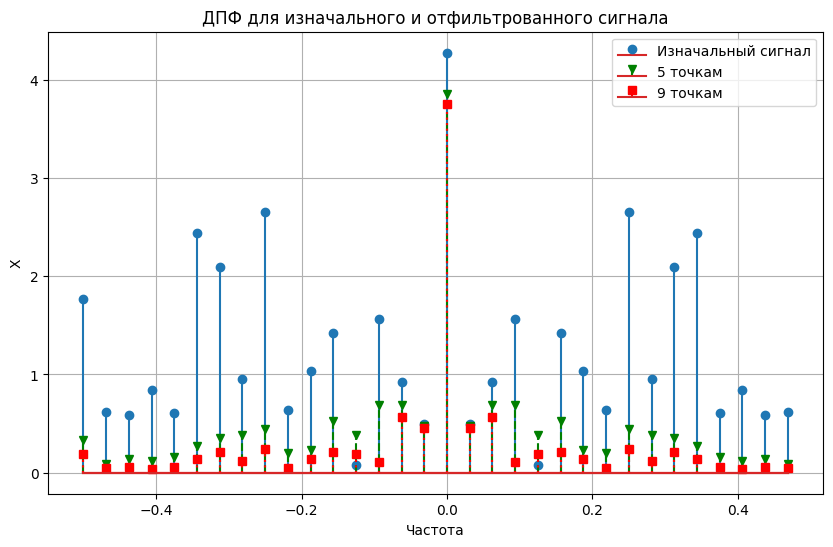

In [7]:
# Визуализация
plt.figure(figsize=(10, 6))

plt.stem(fft_freq_d, np.abs(X), label="Изначальный сигнал")

plt.stem(fft_freq_d,
         np.abs(np.fft.fft(smoothing_5)),
         linefmt="g--",
         markerfmt="v",
         label="5 точкам")

plt.stem(fft_freq_d,
         np.abs(np.fft.fft(smoothing_9)),
         linefmt="r:",
         markerfmt="s",
         label="9 точкам")

plt.title('ДПФ для изначального и отфильтрованного сигнала')
plt.xlabel('Частота')
plt.ylabel('X')
plt.legend()
plt.grid()
plt.show()

7. Проанализируем результат на соответствие значениям $H(\omega)$. Сделаем выводы.

Из результатов анализа спектра следует:
1. Присутствует полоса пропускания в окрестностях нулевой частоты.
2. Сигналы с частотами около 0 ослабевают менее значительно, в то время как высокочастотные сигналы заметно потухают.
3. С увеличением числа точек подавление высоких частот увеличивается.

8. Повторить п. 4–7 для следующих фильтров:

a. Дискретный фильтр, соответствующий численному дифференцированию 1-го порядка.

b. Дискретный фильтр, соответствующий численному интегрированию (прямоугольников, трапеций, Симпсона).

8.а. Дискретный фильтр, соответствующий численному дифференцированию 1-го порядка:

$$y_n = \frac{s_{n+1}-s_{n-1}}{2h}$$

Передаточная функция:

$$H(\omega) = \frac{e^{i\omega}-e^{-i\omega}}{2}=i\cdot sin(\omega)$$

In [8]:
smoothing_d_derivate = np.convolve(signal(time_d), np.array([1, 0, -1]), 'same') / 2

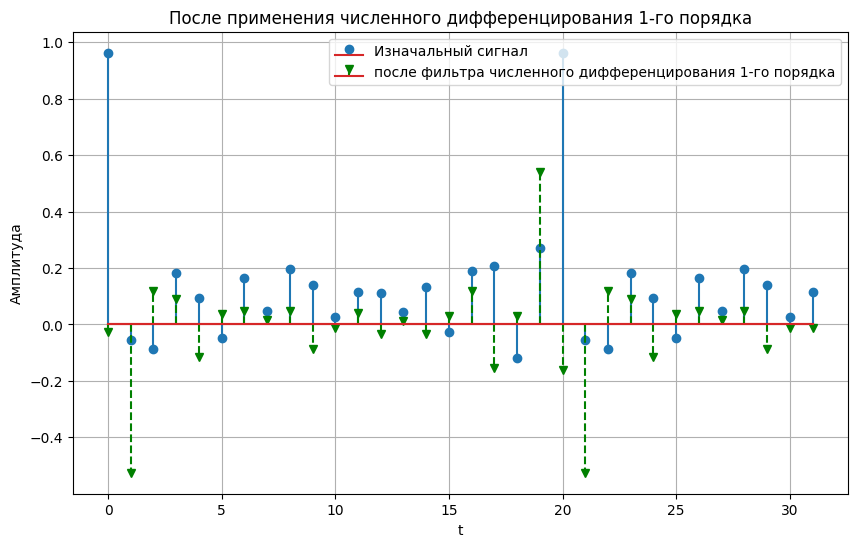

In [9]:
plt.figure(figsize=(10, 6))
plt.stem(time_d, signal(time_d), label="Изначальный сигнал")
plt.stem(time_d, smoothing_d_derivate, linefmt="g--",  markerfmt="v",
label="после фильтра численного дифференцирования 1-го порядка")
plt.ylabel(r"Амплитуда")
plt.xlabel(r"t")
plt.title('После применения численного дифференцирования 1-го порядка')
plt.legend()
plt.grid()
plt.show()

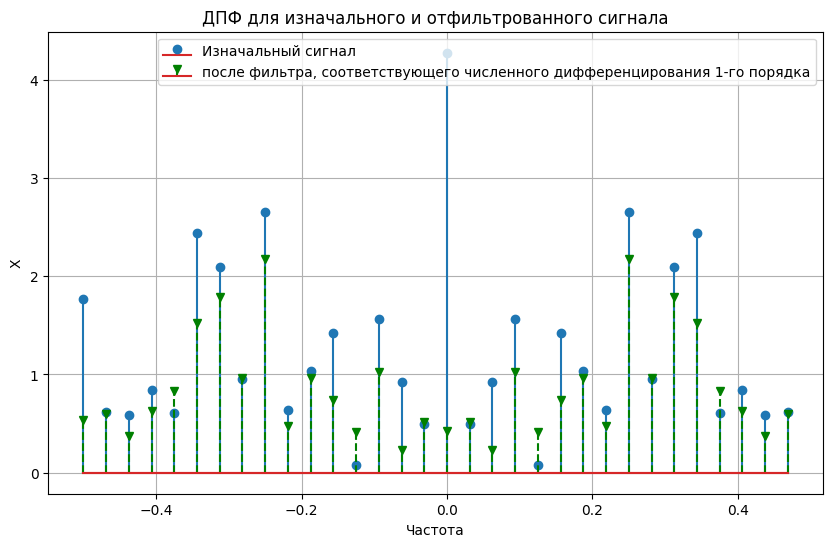

In [10]:
# Визуализация
plt.figure(figsize=(10, 6))

plt.stem(fft_freq_d, np.abs(X), label="Изначальный сигнал")

plt.stem(fft_freq_d,
         np.abs(np.fft.fft(smoothing_d_derivate)),
         linefmt="g--",
         markerfmt="v",
         label="после фильтра, соответствующего численного дифференцирования 1-го порядка")

plt.title('ДПФ для изначального и отфильтрованного сигнала')
plt.xlabel('Частота')
plt.ylabel('X')
plt.legend()
plt.grid()
plt.show()

Проанализируем результат на соответствие значениям $H(\omega)$:

При анализе графиков отмечается соответствие изменений дискретных значений спектра с значениями передаточной функции.

В области высоких частот и частот вблизи нуля наблюдается выраженное подавление частот, в то время как в средних частотах такое не наблюдается.


b. Дискретный фильтр, соответствующий численному интегрированию (прямоугольников, трапеций, Симпсона).

Дискретный фильтр, соответствующий численному интегрированию прямоугольников:

$$y_{n+1} = y_n + s_{n+\frac{1}{2}}$$

Передаточная функция:

$$H(\omega)=\frac{1}{2i\cdot sin(\frac{\omega}{2})}$$

Дискретный фильтр, соответствующий численному интегрированию трапеций:

$$y_{n+1} = y_n + \frac{s_n+s_{n+1}}{2}$$

Передаточная функция:

$$H(\omega)=\frac{1}{2}\frac{cos\big( \frac{\omega}{2} \big)}{i\cdot sin\big( \frac{\omega}{2} \big)}$$

Дискретный фильтр, соответствующий численному интегрированию Симпсона:

$$y_{n+1} = y_{n-1}+\frac{s_{n-1}+4s_n+s_{n+1}}{3}$$

Передаточная функция:

$$H(\omega)=\frac{1}{3}\frac{cos(\omega)+2}{i\cdot sin(\omega)}$$

In [11]:
def integrate_signal(s, method='t'):
    filtered_signal = np.zeros_like(s)

    if method == 't':
        filter_coeffs = np.array([0.5, 0.5])
    elif method == 's':
        filter_coeffs = np.array([0, 1, 4, 1])/3
    elif method == 'r':
        s[0] = 0
        return np.cumsum(s)
    else:
        raise ValueError("Invalid integration method. Choose 't', 's', or 'r'.")

    filtered_signal = np.convolve(s, filter_coeffs, mode="same")
    filtered_signal[0] = 0

    if method == 's':
        return np.ravel([np.cumsum(filtered_signal[::2]), np.cumsum(filtered_signal[1::2])], 'F')
    else:
        return np.cumsum(filtered_signal)

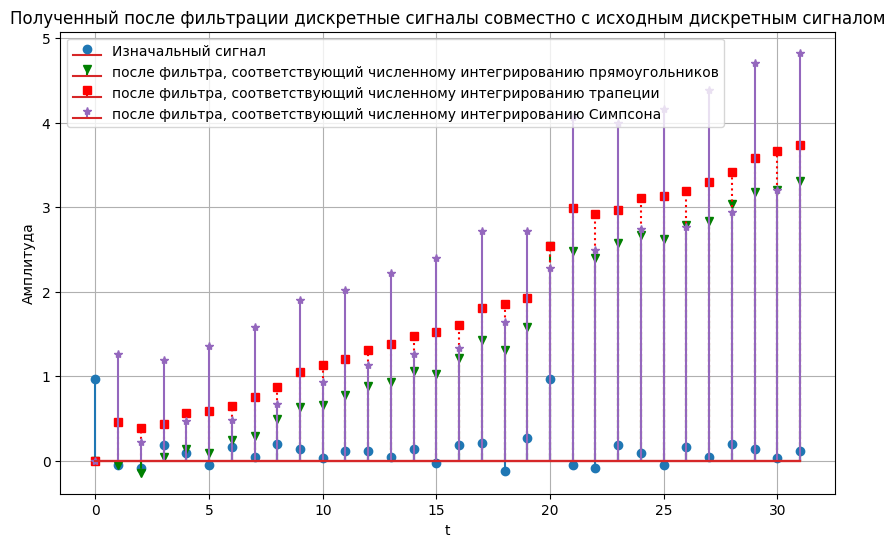

In [12]:
filter_by_r = integrate_signal(signal(time_d), 'r')
filter_by_t = integrate_signal(signal(time_d), 't')
filter_by_s = integrate_signal(signal(time_d), 's')

plt.figure(figsize=(10, 6))
plt.stem(time_d, signal(time_d), label="Изначальный сигнал")
plt.stem(time_d, filter_by_r, linefmt="g--",  markerfmt="v",
label="после фильтра, соответствующий численному интегрированию прямоугольников")
plt.stem(time_d, filter_by_t, linefmt="r:", markerfmt="s",
label="после фильтра, соответствующий численному интегрированию трапеции")
plt.stem(time_d, filter_by_s, linefmt='C4-', markerfmt="*",
label="после фильтра, соответствующий численному интегрированию Симпсона")
plt.ylabel(r"Амплитуда")
plt.xlabel(r"t")
plt.title('Полученный после фильтрации дискретные сигналы совместно с исходным дискретным сигналом')
plt.legend()
plt.grid()
plt.show()

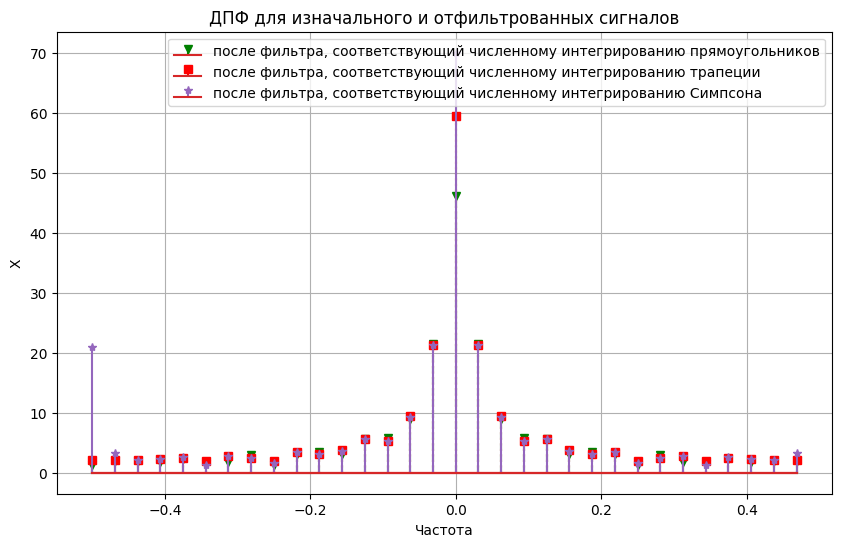

In [13]:
# Визуализация
plt.figure(figsize=(10, 6))

# plt.stem(fft_freq_d, np.abs(X), label="Изначальный сигнал")


plt.stem(fft_freq_d,
         np.abs(np.fft.fft(filter_by_r)),
         linefmt="g--",
         markerfmt="v",
         label="после фильтра, соответствующий численному интегрированию прямоугольников")

plt.stem(fft_freq_d,
         np.abs(np.fft.fft(filter_by_t)),
         linefmt="r:",
         markerfmt="s",
         label="после фильтра, соответствующий численному интегрированию трапеции")

plt.stem(fft_freq_d,
         np.abs(np.fft.fft(filter_by_s)),
         linefmt='C4-',
         markerfmt="*",
         label="после фильтра, соответствующий численному интегрированию Симпсона")

plt.title('ДПФ для изначального и отфильтрованных сигналов')
plt.xlabel('Частота')
plt.ylabel('X')
plt.legend()
plt.grid()
plt.show()

Проанализируем результат на соответствие значениям $H(\omega)$:

При анализе графиков отмечается соответствие изменений дискретных значений спектра с значениями передаточной функции как и в предыдущем пункте.

В области нулевой частоты все фильтры значительно увеличивают амплитуду сигнала.

## Выводы

В результате выполнения практической работы были проведены исследования фильтрации дискретного сигнала с использованием рекурсивных фильтров, основанных на формулах численного дифференцирования и интегрирования.

1. Был смоделирован аналоговый сигнал в виде линейной комбинации косинусоид, после чего произведена его дискретизация.

2. Применено дискретное преобразование Фурье (ДПФ) для нахождения спектра дискретного сигнала. Полученные отсчеты спектра были визуализированы, что дало представление о частотных составляющих сигнала.

3. Использовано линейное сглаживание с фильтрами по 5-ти и 9-ти точкам. Представлены формулы передаточных функций фильтров.

4. Были применены ДПФ для определения спектра дискретного сигнала после фильтрации.

5. Полученные дискретные сигналы после фильтрации визуализированы для наглядного сравнения с исходным сигналом.

6. Проведены аналогичные шаги для дополнительных фильтров, соответствующих численному дифференцированию 1-го порядка и численному интегрированию с использованием различных методов (прямоугольников, трапеций, Симпсона).

7. Обнаружены схожие закономерности между передаточными функциями и соответствующими фильтрами.
